In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df_csv = {}
df_centerline = {}
for i in range(4):
    df_csv[i] = pd.read_csv("./moltres_refined_x"+str(i)+"/benchmark_moltres_csv.csv")
    df_centerline[i] = pd.read_csv("./moltres_refined_x"+str(i)+"/benchmark_moltres_csv_flux_centerline_0003.csv")

In [5]:
ave_temp = {}
ave_temp_diff = {}
max_temp = {}
max_temp_diff = {}
for i in range(4):
    ave_temp[i] = round(df_csv[i]["temp_ave"][3],3)
    max_temp[i] = round(df_csv[i]["temp_max"][3],3)
    if i > 0:
        ave_temp_diff[i] = round(df_csv[i]["temp_ave"][3]-df_csv[i-1]["temp_ave"][3],3)
        max_temp_diff[i] = round(df_csv[i]["temp_max"][3]-df_csv[i-1]["temp_max"][3],3)
data = [ave_temp, ave_temp_diff, max_temp, max_temp_diff]

In [6]:
df_comparison = pd.DataFrame(data, index =['ave_temp', 'ave_temp_diff', 'max_temp', 'max_temp_diff'])

In [7]:
df_comparison = df_comparison.transpose()
df_comparison

,ave_temp,ave_temp_diff,max_temp,max_temp_diff
0,960.619,NaN,1040.931,NaN
1,962.854,2.235,1048.941,8.010
2,963.948,1.093,1057.403,8.463
3,965.020,1.073,1061.599,4.196


1 0.175
2 0.067
3 0.053


Text(0.5, 1.0, 'AHTR Slab Temperature Distribution')

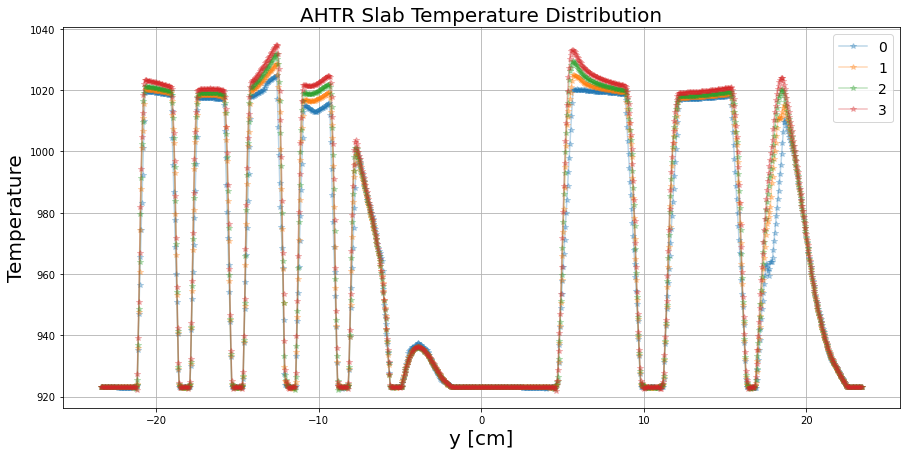

In [8]:
fig, ax = plt.subplots(figsize=(15,7))
for i in range(4):
    alpha = 0.3
    ax.plot(df_centerline[i]['y'], df_centerline[i]['temp'], marker='*', label=i, alpha=alpha)
    #print(round(np.mean(abs(all_slab_temp - np.array(df_centerline[t]['temp']))),3))
    if i > 0:
        print(i, round(np.linalg.norm(np.array(df_centerline[i]['temp'])-np.array(df_centerline[i-1]['temp']))/len(df_centerline[i-1]['temp']),3))
ax.grid()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize=14, bbox_to_anchor = [1.0, 1.0])
#ax.set_ylim(1120, 1130)
ax.set_xlabel("y [cm]", fontsize=20)
ax.set_ylabel("Temperature", fontsize=20)
ax.set_title('AHTR Slab Temperature Distribution', fontsize=20)